# AUTO MOBILE CONSULTING CASE STUDY

Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

-Which variables are significant in predicting the price of a car.

-How well those variables describe the price of a car.


### IMPORTING AND UNDERSTANDING DATA

In [161]:
import pandas as pd
import numpy as np

In [162]:
#Importing CarPrice_Assignment.csv
car = pd.read_csv('Downloads/CarPrice_Assignment.csv')

In [163]:
#look at first five rows of car
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [164]:
#Getting number of rows and columns
car.shape

(205, 26)

In [165]:
#To know what types of columns are stored in dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [166]:
# Converting diesel to 1 and gas to 0
car['fuel_type'] = car['fueltype'].map({'diesel': 1, 'gas': 0})

In [167]:
#To find out whether we have null values or not
round(100*(car.isnull().sum(axis=0))/len(car.index),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
fuel_type           0.0
dtype: float64

In [168]:
car=car.drop(['fueltype'],axis=1)

In [169]:
# Converting std to 1 and turbo to 0
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})

In [170]:
# Creating a dummy variable for 'carbody'
dum1 = pd.get_dummies(car['carbody'])

In [171]:
# we don't need 5 columns.
# we can use drop_first = True to drop the first column from dum1 df.
dum1 = pd.get_dummies(car['carbody'],drop_first=True)

In [172]:
#Adding the results to the master dataframe
car = pd.concat([car,dum1],axis=1)

In [173]:
#As we have converted carbody in to numerical variable we can drop it
car=car.drop(['carbody'],axis=1)

In [174]:
# Creating a dummy variable for 'drivewheel'
dum2 = pd.get_dummies(car['drivewheel'])

In [175]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from dum1 df.
dum2= pd.get_dummies(car['drivewheel'],drop_first=True)

In [176]:
#Adding the results to the master dataframe
car = pd.concat([car,dum2],axis=1)

In [177]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
aspiration          205 non-null int64
doornumber          205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg      

In [178]:
#as we have converted drivewheel into dummy variable drop it

car=car.drop(['drivewheel'],axis=1)

In [179]:
#converting enginelocation variable i.e front to 1 and rear to zero
car['enginelocation'] = car['enginelocation'].map({'front':1, 'rear': 0})

In [180]:
# Creating a dummy variable for 'enginetype'
dum3 = pd.get_dummies(car['enginetype'])

In [181]:
# we don't need 7 columns.
# we can use drop_second = True to drop the first column from dum1 df.
dum3= pd.get_dummies(car['enginetype'],drop_first=True)

In [182]:
#Adding the results to the master dataframe
car = pd.concat([car,dum3],axis=1)

In [183]:
#as we have converted enginetype into dummy variable drop it
car=car.drop("enginetype",axis=1)

In [184]:
# Creating a dummy variable for 'cylindernumber'
dum4 = pd.get_dummies(car['cylindernumber'])

In [185]:
# we don't need 7 columns.
# we can use drop_second = True to drop the first column from dum4 df.
dum4= pd.get_dummies(car['cylindernumber'],drop_first=True)

In [186]:
#Adding the results to the master dataframe
car = pd.concat([car,dum4],axis=1)

In [187]:
car=car.drop(['cylindernumber'],axis=1)

In [188]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
aspiration          205 non-null int64
doornumber          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
fuel_type           205 non-null int64
hardtop           

In [189]:
# Creating a dummy variable for 'fuelsystem'
dum5 = pd.get_dummies(car['fuelsystem'])

In [190]:
# we don't need 7 columns.
# we can use drop_second = True to drop the first column from dum4 df.
dum5= pd.get_dummies(car['fuelsystem'],drop_first=True)

In [191]:
#Adding the results to the master dataframe
car = pd.concat([car,dum4],axis=1)

In [192]:
car=car.drop(['fuelsystem'],axis=1)

In [193]:
#as metioned in the problem statement conly to include company name we have only considered company name
def carn(x):
    y=x['CarName']
    y= y.split(" ")
    return y[0]
car['Cart']=car.apply(carn,axis=1)


In [194]:
# No according to company name we need to convert those categories into numerical values using dummy values

dum6 = pd.get_dummies(car['Cart'])

In [195]:
# we dont want all columns so we have dropped first column of dummy variable
dum6= pd.get_dummies(car['Cart'],drop_first=True)

In [196]:
#Adding the results to the master dataframe
car = pd.concat([car,dum6],axis=1)

In [197]:
#No we have converted all the categorical data columns into numerical data columns so remove categorical data columns
car=car.drop(['CarName','Cart'],axis=1)

In [198]:
car['doornumber']

0       two
1       two
2       two
3      four
4      four
5       two
6      four
7      four
8      four
9       two
10      two
11     four
12      two
13     four
14     four
15     four
16      two
17     four
18      two
19      two
20     four
21      two
22      two
23      two
24     four
25     four
26     four
27      two
28     four
29      two
       ... 
175    four
176    four
177    four
178     two
179     two
180    four
181    four
182     two
183     two
184    four
185    four
186    four
187    four
188    four
189     two
190     two
191    four
192    four
193    four
194    four
195    four
196    four
197    four
198    four
199    four
200    four
201    four
202    four
203    four
204    four
Name: doornumber, Length: 205, dtype: object

In [199]:
# Converting two to 2 and four to 4
car['door_num'] = car['doornumber'].map({'two': 2, 'four': 4})

In [201]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
fuel_type           205 non-null int64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               

In [202]:
car=car.drop(['five','four','six','three','twelve','two','doornumber'], axis=1)

In [203]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car = car.apply(normalize) 

# Splitting Data into Training and Testing Sets

In [205]:
car.columns

Index(['car_ID', 'symboling', 'aspiration', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'fuel_type', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'volvo', 'vw', 'door_num'],
      dtype='object')

In [401]:
# Putting feature variable to X
X = car[['car_ID', 'symboling', 'aspiration', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg',  'fuel_type', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'volvo', 'vw', 'door_num']]
# Putting response variable to y
y = car['price']
    

In [402]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [403]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

In [404]:
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     49.90
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.94e-48
Time:                        22:20:13   Log-Likelihood:                 279.19
No. Observations:                 143   AIC:                            -448.4
Df Residuals:                      88   BIC:                            -285.4
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.2769      0.347  

In [405]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [406]:
# Calculating Vif value
vif_cal(input_data=car, dependent_col="price")

C:\Users\hp\Documents\temp\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
3,enginelocation,inf
27,ohcf,inf
50,subaru,inf
0,car_ID,686.490000
51,toyota,150.490000
17,fuel_type,149.230000
12,compressionratio,136.490000
55,volvo,106.100000
54,volkswagen,84.100000
31,audi,67.560000


## Correlation matrix

In [102]:
curr=car[car.columns]
curr.head()

,car_ID,symboling,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,door_num
0,-0.500000,0.433171,0.180488,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,...,-0.009756,-0.029268,-0.058537,-0.15122,-0.004878,-0.004878,-0.043902,-0.053659,-0.009756,-0.560976
1,-0.495098,0.433171,0.180488,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,...,-0.009756,-0.029268,-0.058537,-0.15122,-0.004878,-0.004878,-0.043902,-0.053659,-0.009756,-0.560976
2,-0.490196,0.033171,0.180488,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,...,-0.009756,-0.029268,-0.058537,-0.15122,-0.004878,-0.004878,-0.043902,-0.053659,-0.009756,-0.560976
3,-0.485294,0.233171,0.180488,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,...,-0.009756,-0.029268,-0.058537,-0.15122,-0.004878,-0.004878,-0.043902,-0.053659,-0.009756,0.439024
4,-0.480392,0.233171,0.180488,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,...,-0.009756,-0.029268,-0.058537,-0.15122,-0.004878,-0.004878,-0.043902,-0.053659,-0.009756,0.439024


In [103]:
cor=curr.corr()
round(cor,3)

,car_ID,symboling,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw,door_num
car_ID,1.000,-0.152,-0.068,-0.051,0.130,0.171,0.052,0.256,0.072,-0.034,...,0.048,0.095,0.175,0.449,0.093,0.095,0.310,0.390,0.147,0.190
symboling,-0.152,1.000,0.060,-0.212,-0.532,-0.358,-0.233,-0.541,-0.228,-0.106,...,0.013,0.233,-0.067,-0.075,-0.103,0.066,0.086,-0.404,0.173,-0.664
aspiration,-0.068,0.060,1.000,-0.057,-0.258,-0.235,-0.301,-0.087,-0.325,-0.108,...,0.047,-0.069,0.009,0.163,0.033,0.033,-0.023,-0.170,0.047,-0.032
enginelocation,-0.051,-0.212,-0.057,1.000,0.188,0.051,0.052,0.106,-0.050,-0.197,...,0.012,0.021,0.030,0.051,0.009,0.009,0.026,0.029,0.012,0.138
wheelbase,0.130,-0.532,-0.258,0.188,1.000,0.875,0.795,0.589,0.776,0.569,...,-0.044,0.010,-0.107,-0.060,0.067,-0.017,-0.015,0.306,-0.070,0.447
carlength,0.171,-0.358,-0.235,0.051,0.875,1.000,0.841,0.491,0.878,0.683,...,0.041,0.177,-0.105,-0.090,0.078,-0.013,0.014,0.285,-0.093,0.399
carwidth,0.052,-0.233,-0.301,0.052,0.795,0.841,1.000,0.279,0.867,0.735,...,0.030,0.048,-0.112,-0.170,0.019,-0.013,0.006,0.229,-0.084,0.207
carheight,0.256,-0.541,-0.087,0.106,0.589,0.491,0.279,1.000,0.296,0.067,...,-0.036,0.169,0.003,-0.003,0.011,0.057,0.156,0.245,-0.009,0.552
curbweight,0.072,-0.228,-0.325,-0.050,0.776,0.878,0.867,0.296,1.000,0.851,...,-0.007,0.063,-0.115,-0.112,0.080,-0.040,-0.074,0.221,-0.061,0.197
enginesize,-0.034,-0.106,-0.108,-0.197,0.569,0.683,0.735,0.067,0.851,1.000,...,0.012,-0.025,-0.119,-0.096,0.057,-0.050,-0.098,0.088,-0.043,0.021


# Dropping the Variable and Updating the Model¶

In [407]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('enginelocation', 1)

In [408]:
# Create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

In [409]:
#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     49.90
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.94e-48
Time:                        22:21:02   Log-Likelihood:                 279.19
No. Observations:                 143   AIC:                            -448.4
Df Residuals:                      88   BIC:                            -285.4
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.2769      0.347  

In [410]:
# Calculating Vif value
#car=car.drop(["enginelocation"], axis=1)
vif_cal(input_data=car.drop(["enginelocation"],axis=1), dependent_col="price")

,Var,Vif
0,car_ID,686.49
50,toyota,150.49
16,fuel_type,149.23
11,compressionratio,136.49
54,volvo,106.10
53,volkswagen,84.10
49,subaru,71.76
30,audi,67.56
31,bmw,67.44
14,citympg,52.38


In [411]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('car_ID', 1)

In [412]:
# Create a fifth fitted model
lm_3 = sm.OLS(y_train,X_train).fit()

In [413]:
#Let's see the summary of our fifth linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     51.04
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.36e-49
Time:                        22:21:37   Log-Likelihood:                 278.68
No. Observations:                 143   AIC:                            -449.4
Df Residuals:                      89   BIC:                            -289.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0013      0.037  

In [414]:
# Calculating Vif value
vif_cal(input_data=car.drop(["enginelocation","car_ID"], axis=1), dependent_col="price")

,Var,Vif
15,fuel_type,144.72
10,compressionratio,131.27
13,citympg,52.09
14,highwaympg,45.33
48,subaru,44.78
7,enginesize,39.45
6,curbweight,39.33
11,horsepower,36.09
42,peugeot,35.39
25,ohcf,32.35


In [415]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fuel_type', 1)

In [416]:
lm_4 = sm.OLS(y_train,X_train).fit()

In [417]:
#Let's see the summary of our fifth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     50.03
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.09e-48
Time:                        22:22:21   Log-Likelihood:                 275.21
No. Observations:                 143   AIC:                            -444.4
Df Residuals:                      90   BIC:                            -287.4
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0030      0.038  

In [418]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type"], axis=1), dependent_col="price")

,Var,Vif
13,citympg,51.33
14,highwaympg,45.07
47,subaru,44.71
7,enginesize,39.14
6,curbweight,38.53
11,horsepower,35.79
41,peugeot,35.13
24,ohcf,32.31
48,toyota,30.91
17,sedan,24.49


In [419]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohcf', 1)

In [420]:
lm_5 = sm.OLS(y_train,X_train).fit()

In [421]:
#Let's see the summary of our  linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     43.41
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.51e-46
Time:                        22:22:58   Log-Likelihood:                 263.32
No. Observations:                 143   AIC:                            -422.6
Df Residuals:                      91   BIC:                            -268.6
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0112      0.041  

In [422]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf"], axis=1), dependent_col="price")

,Var,Vif
13,citympg,51.20
14,highwaympg,44.92
7,enginesize,38.93
6,curbweight,37.96
40,peugeot,34.66
11,horsepower,34.51
47,toyota,30.91
17,sedan,22.86
3,carlength,21.83
22,l,21.56


In [423]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('peakrpm', 1)

In [424]:
lm_6 = sm.OLS(y_train,X_train).fit()

In [425]:
#Let's see the summary of our fifth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     40.31
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.38e-45
Time:                        22:23:31   Log-Likelihood:                 256.15
No. Observations:                 143   AIC:                            -410.3
Df Residuals:                      92   BIC:                            -259.2
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0097      0.042  

In [426]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm"], axis=1), dependent_col="price")

,Var,Vif
12,citympg,51.14
13,highwaympg,44.22
6,curbweight,37.09
39,peugeot,34.56
46,toyota,30.67
7,enginesize,30.36
11,horsepower,28.37
16,sedan,22.76
3,carlength,21.81
21,l,20.74


In [427]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('citympg', 1)

In [428]:
# Create a fifth fitted model
lm_7 = sm.OLS(y_train,X_train).fit()

In [429]:
#Let's see the summary of our fifth linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     41.58
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.24e-46
Time:                        22:24:01   Log-Likelihood:                 256.14
No. Observations:                 143   AIC:                            -412.3
Df Residuals:                      93   BIC:                            -264.1
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0098      0.042  

In [430]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg"], axis=1), dependent_col="price")

,Var,Vif
6,curbweight,35.26
38,peugeot,34.50
45,toyota,30.49
7,enginesize,29.48
11,horsepower,27.09
15,sedan,22.75
3,carlength,21.80
20,l,20.71
44,subaru,18.78
37,nissan,17.73


In [431]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('aspiration', 1)

In [432]:
# Create a fifth fitted model
lm_8 = sm.OLS(y_train,X_train).fit()

In [433]:
#Let's see the summary of our fifth linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     41.45
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.59e-46
Time:                        22:24:29   Log-Likelihood:                 253.78
No. Observations:                 143   AIC:                            -409.6
Df Residuals:                      94   BIC:                            -264.4
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0041      0.043  

In [434]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration"], axis=1), dependent_col="price")

,Var,Vif
5,curbweight,35.09
37,peugeot,34.23
44,toyota,30.49
14,sedan,22.74
6,enginesize,22.56
2,carlength,21.47
19,l,20.60
43,subaru,18.65
36,nissan,17.72
1,wheelbase,17.56


In [435]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('chevrolet', 1)

In [436]:
# Create a fifth fitted model
lm_9 = sm.OLS(y_train,X_train).fit()

In [437]:
#Let's see the summary of our fifth linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     42.73
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.72e-47
Time:                        22:25:07   Log-Likelihood:                 253.71
No. Observations:                 143   AIC:                            -411.4
Df Residuals:                      95   BIC:                            -269.2
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0036      0.042  

In [438]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet"], axis=1), dependent_col="price")

,Var,Vif
5,curbweight,34.58
14,sedan,22.70
6,enginesize,22.56
2,carlength,21.08
19,l,19.00
36,peugeot,18.44
10,horsepower,17.39
1,wheelbase,17.24
13,hatchback,17.15
17,rwd,16.28


In [439]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('subaru',1)

In [440]:
# Create a fifth fitted model
lm_10 = sm.OLS(y_train,X_train).fit()

In [441]:
#Let's see the summary of our fifth linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     44.08
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           8.91e-48
Time:                        22:25:41   Log-Likelihood:                 253.64
No. Observations:                 143   AIC:                            -413.3
Df Residuals:                      96   BIC:                            -274.0
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0051      0.042  

In [442]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru"], axis=1), dependent_col="price")

,Var,Vif
5,curbweight,34.58
6,enginesize,22.54
14,sedan,22.23
2,carlength,20.98
36,peugeot,18.03
1,wheelbase,17.06
10,horsepower,16.65
13,hatchback,16.56
19,l,16.18
17,rwd,15.48


In [443]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('curbweight', 1)

In [444]:
# Create a  fitted model
lm_11 = sm.OLS(y_train,X_train).fit()

In [445]:
#Let's see the summary of  linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     42.66
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.48e-47
Time:                        22:26:14   Log-Likelihood:                 249.21
No. Observations:                 143   AIC:                            -406.4
Df Residuals:                      97   BIC:                            -270.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0002      0.043  

In [446]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight"], axis=1), dependent_col="price")

,Var,Vif
5,enginesize,21.83
13,sedan,20.90
2,carlength,18.58
35,peugeot,18.02
1,wheelbase,16.94
12,hatchback,16.09
18,l,15.91
16,rwd,15.15
9,horsepower,15.12
3,carwidth,12.00


In [447]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('boreratio', 1)

In [448]:
# Create a fitted model
lm_12 = sm.OLS(y_train,X_train).fit()

In [449]:
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     42.03
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.26e-47
Time:                        22:26:43   Log-Likelihood:                 245.97
No. Observations:                 143   AIC:                            -401.9
Df Residuals:                      98   BIC:                            -268.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0069      0.043  

In [450]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio"], axis=1), dependent_col="price")

,Var,Vif
12,sedan,20.69
5,enginesize,20.08
2,carlength,18.43
34,peugeot,18.02
1,wheelbase,16.87
11,hatchback,15.91
17,l,15.72
15,rwd,15.10
8,horsepower,14.90
3,carwidth,11.98


In [451]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carwidth', 1)

In [452]:
# Create a fitted model
lm_13 = sm.OLS(y_train,X_train).fit()

In [453]:
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     41.06
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           6.57e-47
Time:                        22:27:10   Log-Likelihood:                 242.13
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                      99   BIC:                            -265.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0271      0.044  

In [454]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth"], axis=1), dependent_col="price")

,Var,Vif
11,sedan,20.54
4,enginesize,20.08
33,peugeot,17.10
2,carlength,17.04
10,hatchback,15.91
16,l,15.37
1,wheelbase,15.03
14,rwd,14.99
7,horsepower,14.17
12,wagon,10.86


In [455]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('sedan', 1)

In [456]:
# Create a fitted model
lm_14 = sm.OLS(y_train,X_train).fit()

In [457]:
#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     40.01
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.55e-46
Time:                        22:27:39   Log-Likelihood:                 238.12
No. Observations:                 143   AIC:                            -390.2
Df Residuals:                     100   BIC:                            -262.8
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0461      0.044  

In [458]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan"], axis=1), dependent_col="price")

,Var,Vif
4,enginesize,18.96
32,peugeot,17.06
2,carlength,16.96
15,l,15.35
13,rwd,14.98
1,wheelbase,14.66
7,horsepower,14.00
12,fwd,9.53
8,highwaympg,8.38
16,ohc,6.17


In [459]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('buick', 1)

In [460]:
# Create a fitted model
lm_15 = sm.OLS(y_train,X_train).fit()

In [461]:
#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     30.21
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.61e-41
Time:                        22:28:13   Log-Likelihood:                 217.07
No. Observations:                 143   AIC:                            -350.1
Df Residuals:                     101   BIC:                            -225.7
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0648      0.050  

In [462]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick"], axis=1), dependent_col="price")

,Var,Vif
4,enginesize,17.65
2,carlength,16.90
31,peugeot,15.41
15,l,15.32
1,wheelbase,14.32
7,horsepower,13.84
13,rwd,13.84
12,fwd,9.43
8,highwaympg,8.34
3,carheight,6.02


In [463]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carlength', 1)

In [464]:
# Create a fitted model
lm_16= sm.OLS(y_train,X_train).fit()

In [465]:
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.26e-41
Time:                        22:28:37   Log-Likelihood:                 216.44
No. Observations:                 143   AIC:                            -350.9
Df Residuals:                     102   BIC:                            -229.4
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0685      0.050  

In [466]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength"], axis=1), dependent_col="price")

,Var,Vif
3,enginesize,16.04
14,l,15.28
30,peugeot,15.21
6,horsepower,13.84
12,rwd,13.80
1,wheelbase,10.00
11,fwd,9.40
7,highwaympg,7.46
2,carheight,5.76
0,symboling,5.37


In [470]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('enginesize', 1)

ValueError: labels ['enginesize'] not contained in axis

In [471]:
# Create a fitted model
lm_17 = sm.OLS(y_train,X_train).fit()

In [472]:
#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     27.08
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.17e-39
Time:                        22:30:26   Log-Likelihood:                 205.32
No. Observations:                 143   AIC:                            -330.6
Df Residuals:                     103   BIC:                            -212.1
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.1052      0.053  

In [473]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize"], axis=1), dependent_col="price")

,Var,Vif
29,peugeot,15.17
13,l,15.16
11,rwd,13.78
5,horsepower,10.10
10,fwd,9.40
1,wheelbase,8.19
6,highwaympg,7.44
2,carheight,5.75
14,ohc,5.08
0,symboling,4.90


In [474]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wheelbase', 1)

In [475]:
# Create a fitted model
lm_18 = sm.OLS(y_train,X_train).fit()

In [476]:
#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     23.29
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.46e-36
Time:                        22:32:31   Log-Likelihood:                 193.28
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     104   BIC:                            -193.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0393      0.055  

In [282]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase"], axis=1), dependent_col="price")

,Var,Vif
12,l,15.01
28,peugeot,14.72
10,rwd,11.28
4,horsepower,10.10
9,fwd,8.44
5,highwaympg,6.70
13,ohc,5.07
1,carheight,4.85
0,symboling,4.56
40,door_num,3.35


In [477]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('carheight', 1)

In [478]:
# Create a fitted model
lm_19 = sm.OLS(y_train,X_train).fit()

In [479]:
#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     23.90
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.43e-36
Time:                        22:33:12   Log-Likelihood:                 192.62
No. Observations:                 143   AIC:                            -309.2
Df Residuals:                     105   BIC:                            -196.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0272      0.054  

In [480]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight"], axis=1), dependent_col="price")

,Var,Vif
11,l,14.85
27,peugeot,14.71
9,rwd,11.04
3,horsepower,9.52
8,fwd,8.35
4,highwaympg,6.36
12,ohc,5.07
0,symboling,4.14
39,door_num,3.35
25,mitsubishi,2.99


In [481]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('rotor', 1)

In [482]:
# Create a fitted model
lm_20 = sm.OLS(y_train,X_train).fit()

In [483]:
#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     24.80
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.85e-37
Time:                        22:34:44   Log-Likelihood:                 192.62
No. Observations:                 143   AIC:                            -311.2
Df Residuals:                     106   BIC:                            -201.6
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0271      0.053  

In [484]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor"], axis=1), dependent_col="price")

,Var,Vif
11,l,14.85
26,peugeot,14.61
9,rwd,10.70
3,horsepower,8.99
8,fwd,8.31
4,highwaympg,6.06
12,ohc,4.42
0,symboling,4.08
38,door_num,3.35
1,stroke,2.97


In [485]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('l', 1)

In [486]:
# Create a fitted model
lm_21 = sm.OLS(y_train,X_train).fit()

In [487]:
#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     25.43
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.76e-38
Time:                        22:36:35   Log-Likelihood:                 191.84
No. Observations:                 143   AIC:                            -311.7
Df Residuals:                     107   BIC:                            -205.0
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0277      0.053  

In [488]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l"], axis=1), dependent_col="price")

,Var,Vif
9,rwd,10.67
3,horsepower,8.99
8,fwd,8.30
4,highwaympg,5.37
11,ohc,4.21
0,symboling,4.08
37,door_num,3.35
23,mitsubishi,2.89
1,stroke,2.84
31,toyota,2.76


In [489]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('rwd', 1)

In [490]:
# Create a fitted model
lm_22 = sm.OLS(y_train,X_train).fit()

In [491]:
#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     25.04
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.30e-37
Time:                        22:38:07   Log-Likelihood:                 188.39
No. Observations:                 143   AIC:                            -306.8
Df Residuals:                     108   BIC:                            -203.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0575      0.052  

In [492]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,8.75
4,highwaympg,5.37
10,ohc,4.19
8,fwd,4.02
0,symboling,3.94
36,door_num,3.33
22,mitsubishi,2.85
1,stroke,2.77
30,toyota,2.69
6,hatchback,2.39


In [493]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('hardtop', 1)

In [494]:
# Create a fitted model
lm_23 = sm.OLS(y_train,X_train).fit()

In [495]:
#Let's see the summary of our linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     26.00
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.78e-38
Time:                        22:40:50   Log-Likelihood:                 188.30
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     109   BIC:                            -207.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0593      0.052  

In [496]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,7.96
4,highwaympg,5.32
8,fwd,4.01
0,symboling,3.94
10,ohc,3.86
35,door_num,3.32
21,mitsubishi,2.74
1,stroke,2.71
29,toyota,2.55
6,hatchback,2.37


In [497]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('porcshce', 1)

In [498]:
#Create a fitted model
lm_24 = sm.OLS(y_train,X_train).fit()

In [499]:
#Let's see the summary of our linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     26.00
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.78e-38
Time:                        22:42:36   Log-Likelihood:                 188.30
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     109   BIC:                            -207.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0593      0.052  

In [509]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,6.95
4,highwaympg,5.17
8,fwd,4.00
0,symboling,3.87
10,ohc,3.86
34,door_num,3.28
21,mitsubishi,2.74
1,stroke,2.62
28,toyota,2.53
6,hatchback,2.37


In [505]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('vokswagen', 1)

ValueError: labels ['vokswagen'] not contained in axis

In [502]:
# Create a fitted model
lm_25 = sm.OLS(y_train,X_train).fit()

In [503]:
#Let's see the summary of our linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     26.00
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.78e-38
Time:                        22:44:34   Log-Likelihood:                 188.30
No. Observations:                 143   AIC:                            -308.6
Df Residuals:                     109   BIC:                            -207.9
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0593      0.052  

In [510]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,6.95
4,highwaympg,5.16
8,fwd,3.96
10,ohc,3.84
0,symboling,3.78
33,door_num,3.25
21,mitsubishi,2.64
1,stroke,2.60
28,toyota,2.46
6,hatchback,2.32


In [511]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('wagon', 1)

In [512]:
# Create a fitted model
lm_26 = sm.OLS(y_train,X_train).fit()

In [513]:
#Let's see the summary of our linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     27.02
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.58e-39
Time:                        22:49:46   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -310.5
Df Residuals:                     110   BIC:                            -212.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0601      0.052  

In [514]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,6.81
4,highwaympg,5.00
7,fwd,3.96
9,ohc,3.84
0,symboling,3.76
32,door_num,3.23
20,mitsubishi,2.64
1,stroke,2.58
27,toyota,2.46
6,hatchback,2.30


In [515]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mercury', 1)

In [516]:
# Create a fitted model
lm_27 = sm.OLS(y_train,X_train).fit()

In [517]:
#Let's see the summary of our linear model
print(lm_27.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     27.28
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.53e-39
Time:                        22:51:42   Log-Likelihood:                 188.21
No. Observations:                 143   AIC:                            -312.4
Df Residuals:                     111   BIC:                            -217.6
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0590      0.051  

In [518]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury"], axis=1), dependent_col="price")

,Var,Vif
3,horsepower,6.81
4,highwaympg,5.00
7,fwd,3.96
9,ohc,3.84
0,symboling,3.76
32,door_num,3.23
20,mitsubishi,2.64
1,stroke,2.58
27,toyota,2.46
6,hatchback,2.30


In [519]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('horsepower', 1)

In [520]:
# Create a fitted model
lm_28 = sm.OLS(y_train,X_train).fit()

In [521]:
#Let's see the summary of our linear model
print(lm_28.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     21.88
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.45e-34
Time:                        22:53:24   Log-Likelihood:                 171.89
No. Observations:                 143   AIC:                            -281.8
Df Residuals:                     112   BIC:                            -189.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling            0.0395      0.057  

In [522]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower"], axis=1), dependent_col="price")

,Var,Vif
6,fwd,3.92
0,symboling,3.76
8,ohc,3.66
3,highwaympg,3.58
31,door_num,3.19
19,mitsubishi,2.64
26,toyota,2.45
1,stroke,2.31
5,hatchback,2.30
20,nissan,2.20


In [523]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('symboling', 1)


In [524]:
lm_29= sm.OLS(y_train,X_train).fit()

In [525]:
#Let's see the summary of our linear model
print(lm_29.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.77e-35
Time:                        22:54:42   Log-Likelihood:                 171.59
No. Observations:                 143   AIC:                            -283.2
Df Residuals:                     113   BIC:                            -194.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.2900      0.075  

In [526]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling"], axis=1), dependent_col="price")

,Var,Vif
5,fwd,3.78
2,highwaympg,3.47
7,ohc,3.36
25,toyota,2.44
30,door_num,2.36
18,mitsubishi,2.32
0,stroke,2.30
4,hatchback,2.29
13,honda,2.17
19,nissan,2.09


In [527]:
X_train = X_train.drop('toyouta', 1)
lm_30 = sm.OLS(y_train,X_train).fit()

In [528]:
#Let's see the summary of our linear model
print(lm_30.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     23.55
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.02e-35
Time:                        22:56:18   Log-Likelihood:                 171.21
No. Observations:                 143   AIC:                            -284.4
Df Residuals:                     114   BIC:                            -198.5
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.2798      0.073  

In [529]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv"], axis=1), dependent_col="price")

,Var,Vif
5,fwd,3.78
2,highwaympg,3.46
6,ohc,3.34
24,toyota,2.44
29,door_num,2.35
17,mitsubishi,2.32
0,stroke,2.29
4,hatchback,2.28
12,honda,2.17
18,nissan,2.09


In [530]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('audi', 1)
lm_31 = sm.OLS(y_train,X_train).fit()
print(lm_31.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     24.60
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.04e-36
Time:                        22:57:25   Log-Likelihood:                 171.21
No. Observations:                 143   AIC:                            -286.4
Df Residuals:                     115   BIC:                            -203.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.2804      0.072  

In [531]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi"], axis=1), dependent_col="price")

,Var,Vif
5,fwd,3.68
2,highwaympg,3.26
6,ohc,3.05
28,door_num,2.34
4,hatchback,2.27
0,stroke,2.24
23,toyota,2.05
16,mitsubishi,1.87
17,nissan,1.85
11,honda,1.83


In [532]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('volvo', 1)
lm_32 = sm.OLS(y_train,X_train).fit()
print(lm_32.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     25.73
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.97e-37
Time:                        22:59:06   Log-Likelihood:                 171.21
No. Observations:                 143   AIC:                            -288.4
Df Residuals:                     116   BIC:                            -208.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.2800      0.071  

In [533]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,3.25
5,fwd,3.11
6,ohc,2.69
27,door_num,2.27
4,hatchback,2.27
0,stroke,2.23
16,mitsubishi,1.83
17,nissan,1.80
23,toyota,1.78
11,honda,1.78


In [535]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('renault', 1)
lm_33 = sm.OLS(y_train,X_train).fit()
print(lm_33.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     24.62
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.11e-35
Time:                        23:01:04   Log-Likelihood:                 162.83
No. Observations:                 143   AIC:                            -275.7
Df Residuals:                     118   BIC:                            -201.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1540      0.066  

In [536]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","l","rwd","horsepower","hatchback","carheight","fwd","hardtop","symboling","highwaympg","vokswagen","plymouth","saab","volkswagen","ohc","renault"], axis=1), dependent_col="price")

,Var,Vif
14,mazda,1.61
21,toyota,1.44
20,porsche,1.44
25,door_num,1.43
16,mitsubishi,1.42
17,nissan,1.40
5,rotor,1.40
0,stroke,1.38
10,honda,1.33
3,dohcv,1.33


In [537]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('door_num', 1)
lm_34 = sm.OLS(y_train,X_train).fit()
print(lm_34.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     25.84
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.27e-36
Time:                        23:02:25   Log-Likelihood:                 162.76
No. Observations:                 143   AIC:                            -277.5
Df Residuals:                     119   BIC:                            -206.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1540      0.066  

In [538]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,3.19
5,fwd,2.97
6,ohc,2.67
0,stroke,2.00
7,ohcv,1.77
1,compressionratio,1.72
17,nissan,1.69
22,toyota,1.68
16,mitsubishi,1.67
11,honda,1.63


In [539]:
X_train = X_train.drop('isuzu', 1)
lm_35 = sm.OLS(y_train,X_train).fit()
print(lm_35.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     27.15
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.62e-37
Time:                        23:03:33   Log-Likelihood:                 162.67
No. Observations:                 143   AIC:                            -279.3
Df Residuals:                     120   BIC:                            -211.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1535      0.066  

In [540]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,3.03
5,fwd,2.92
6,ohc,2.65
0,stroke,1.99
7,ohcv,1.76
1,compressionratio,1.67
16,nissan,1.64
15,mitsubishi,1.63
17,peugeot,1.60
21,toyota,1.58


In [542]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('alfa-romero', 1)
lm_36 = sm.OLS(y_train,X_train).fit()
print(lm_36.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     28.55
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           9.47e-38
Time:                        23:06:39   Log-Likelihood:                 162.54
No. Observations:                 143   AIC:                            -281.1
Df Residuals:                     121   BIC:                            -215.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1532      0.066  

In [543]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,3.01
5,fwd,2.88
6,ohc,2.59
0,stroke,1.98
7,ohcv,1.75
1,compressionratio,1.67
14,mitsubishi,1.63
15,nissan,1.62
10,honda,1.57
20,toyota,1.57


In [544]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('ohc', 1)
lm_37 = sm.OLS(y_train,X_train).fit()
print(lm_37.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     30.05
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.04e-38
Time:                        23:08:41   Log-Likelihood:                 162.32
No. Observations:                 143   AIC:                            -282.6
Df Residuals:                     122   BIC:                            -220.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1734      0.057  

In [545]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.89
5,fwd,2.85
0,stroke,1.66
1,compressionratio,1.66
14,nissan,1.62
13,mitsubishi,1.62
9,honda,1.56
19,toyota,1.56
6,ohcv,1.55
4,hatchback,1.38


In [546]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('vw', 1)
lm_38 = sm.OLS(y_train,X_train).fit()
print(lm_38.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           4.54e-39
Time:                        23:10:28   Log-Likelihood:                 162.03
No. Observations:                 143   AIC:                            -284.1
Df Residuals:                     123   BIC:                            -224.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1713      0.057  

In [547]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.88
5,fwd,2.77
1,compressionratio,1.66
0,stroke,1.64
14,nissan,1.59
13,mitsubishi,1.56
6,ohcv,1.54
19,toyota,1.53
9,honda,1.52
4,hatchback,1.37


In [548]:
X_train = X_train.drop('plymouth', 1)
lm_39 = sm.OLS(y_train,X_train).fit()
print(lm_39.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     33.32
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.16e-39
Time:                        23:11:46   Log-Likelihood:                 161.54
No. Observations:                 143   AIC:                            -285.1
Df Residuals:                     124   BIC:                            -228.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1681      0.056  

In [549]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.83
5,fwd,2.75
1,compressionratio,1.62
0,stroke,1.57
6,ohcv,1.54
14,nissan,1.50
13,mitsubishi,1.44
18,toyota,1.41
9,honda,1.40
4,hatchback,1.35


In [550]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('volkswagen', 1)
lm_40 = sm.OLS(y_train,X_train).fit()
print(lm_40.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     35.03
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.54e-40
Time:                        23:12:59   Log-Likelihood:                 160.82
No. Observations:                 143   AIC:                            -285.6
Df Residuals:                     125   BIC:                            -232.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1632      0.056  

In [551]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.82
5,fwd,2.65
1,compressionratio,1.60
0,stroke,1.54
6,ohcv,1.54
14,nissan,1.44
13,mitsubishi,1.39
18,toyota,1.36
4,hatchback,1.34
9,honda,1.34


In [552]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('dodge', 1)
lm_41 = sm.OLS(y_train,X_train).fit()
print(lm_41.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     37.09
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           8.63e-41
Time:                        23:13:52   Log-Likelihood:                 160.33
No. Observations:                 143   AIC:                            -286.7
Df Residuals:                     126   BIC:                            -236.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1603      0.056  

In [556]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.81
5,fwd,2.60
1,compressionratio,1.57
6,ohcv,1.54
0,stroke,1.51
13,nissan,1.38
4,hatchback,1.32
14,peugeot,1.30
17,toyota,1.30
12,mitsubishi,1.30


In [557]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('maxda', 1)
lm_42 = sm.OLS(y_train,X_train).fit()
print(lm_42.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     39.37
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.10e-41
Time:                        23:17:36   Log-Likelihood:                 159.82
No. Observations:                 143   AIC:                            -287.6
Df Residuals:                     127   BIC:                            -240.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1636      0.056  

In [558]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.81
5,fwd,2.58
1,compressionratio,1.57
6,ohcv,1.54
0,stroke,1.50
12,nissan,1.37
13,peugeot,1.30
11,mitsubishi,1.29
16,toyota,1.28
4,hatchback,1.28


In [559]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('dohcv', 1)
lm_43 = sm.OLS(y_train,X_train).fit()
print(lm_43.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     41.88
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.50e-42
Time:                        23:18:31   Log-Likelihood:                 159.19
No. Observations:                 143   AIC:                            -288.4
Df Residuals:                     128   BIC:                            -243.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1647      0.056  

In [560]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.81
5,fwd,2.58
1,compressionratio,1.57
6,ohcv,1.54
0,stroke,1.50
12,nissan,1.37
13,peugeot,1.30
11,mitsubishi,1.29
16,toyota,1.28
4,hatchback,1.28


In [561]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mitsubishi', 1)
lm_44 = sm.OLS(y_train,X_train).fit()
print(lm_44.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     44.72
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.44e-42
Time:                        23:19:29   Log-Likelihood:                 158.53
No. Observations:                 143   AIC:                            -289.1
Df Residuals:                     129   BIC:                            -247.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1536      0.055  

In [562]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.80
5,fwd,2.49
1,compressionratio,1.55
6,ohcv,1.54
0,stroke,1.44
11,nissan,1.33
12,peugeot,1.30
15,toyota,1.24
4,hatchback,1.24
14,saab,1.22


In [563]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('toyota', 1)
lm_45 = sm.OLS(y_train,X_train).fit()
print(lm_45.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     48.07
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.35e-43
Time:                        23:20:32   Log-Likelihood:                 157.96
No. Observations:                 143   AIC:                            -289.9
Df Residuals:                     130   BIC:                            -251.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1524      0.055  

In [564]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.69
5,fwd,2.38
1,compressionratio,1.55
6,ohcv,1.54
0,stroke,1.44
11,nissan,1.30
12,peugeot,1.27
4,hatchback,1.23
14,saab,1.22
7,bmw,1.17


In [565]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('mazda', 1)
lm_46= sm.OLS(y_train,X_train).fit()
print(lm_46.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     51.84
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           8.71e-44
Time:                        23:21:36   Log-Likelihood:                 157.23
No. Observations:                 143   AIC:                            -290.5
Df Residuals:                     131   BIC:                            -254.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1507      0.055  

In [566]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.68
5,fwd,2.37
1,compressionratio,1.54
6,ohcv,1.53
0,stroke,1.44
10,nissan,1.30
11,peugeot,1.26
4,hatchback,1.22
13,saab,1.22
7,bmw,1.16


In [568]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('peugeot', 1)
lm_47 = sm.OLS(y_train,X_train).fit()
print(lm_47.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.26e-44
Time:                        23:22:54   Log-Likelihood:                 156.06
No. Observations:                 143   AIC:                            -290.1
Df Residuals:                     132   BIC:                            -257.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1538      0.055  

In [569]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.64
5,fwd,2.29
6,ohcv,1.50
1,compressionratio,1.47
0,stroke,1.42
10,nissan,1.29
4,hatchback,1.21
12,saab,1.21
7,bmw,1.13
8,honda,1.13


In [570]:
 # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('nissan', 1)
lm_48 = sm.OLS(y_train,X_train).fit()
print(lm_48.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     60.22
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.80e-44
Time:                        23:23:39   Log-Likelihood:                 154.43
No. Observations:                 143   AIC:                            -288.9
Df Residuals:                     133   BIC:                            -259.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1396      0.055  

In [571]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.56
5,fwd,2.28
1,compressionratio,1.46
0,stroke,1.40
6,ohcv,1.22
11,saab,1.21
4,hatchback,1.20
7,bmw,1.13
3,hardtop,1.11
9,jaguar,1.11


In [572]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('saab', 1)
lm_49 = sm.OLS(y_train,X_train).fit()
print(lm_49.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     65.37
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.12e-44
Time:                        23:24:57   Log-Likelihood:                 152.64
No. Observations:                 143   AIC:                            -287.3
Df Residuals:                     134   BIC:                            -260.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.1226      0.055  

In [573]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan","saab"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,2.29
5,fwd,2.03
1,compressionratio,1.42
0,stroke,1.27
6,ohcv,1.20
4,hatchback,1.18
7,bmw,1.13
3,hardtop,1.11
9,jaguar,1.11
8,honda,1.10


In [574]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('fwd', 1)
lm_50 = sm.OLS(y_train,X_train).fit()
print(lm_50.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     72.00
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           5.94e-45
Time:                        23:26:06   Log-Likelihood:                 150.97
No. Observations:                 143   AIC:                            -285.9
Df Residuals:                     135   BIC:                            -262.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
stroke               0.0954      0.053  

In [575]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan","saab","fwd"], axis=1), dependent_col="price")

,Var,Vif
2,highwaympg,1.47
1,compressionratio,1.25
5,ohcv,1.19
0,stroke,1.18
4,hatchback,1.18
7,honda,1.10
8,jaguar,1.10
6,bmw,1.08
3,hardtop,1.07
9,porsche,1.07


In [576]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('stroke', 1)
lm_51 = sm.OLS(y_train,X_train).fit()
print(lm_51.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     80.51
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           3.07e-45
Time:                        23:26:41   Log-Likelihood:                 149.29
No. Observations:                 143   AIC:                            -284.6
Df Residuals:                     136   BIC:                            -263.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
compressionratio     0.2573      0.032  

In [577]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan","saab","fwd","stroke"], axis=1), dependent_col="price")

,Var,Vif
1,highwaympg,1.44
4,ohcv,1.18
0,compressionratio,1.17
3,hatchback,1.15
5,bmw,1.08
2,hardtop,1.07
7,jaguar,1.07
6,honda,1.05
8,porsche,1.05
9,toyouta,1.01


In [578]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('hatchback', 1)
lm_52 = sm.OLS(y_train,X_train).fit()
print(lm_52.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     92.44
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           1.08e-45
Time:                        23:27:58   Log-Likelihood:                 147.95
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     137   BIC:                            -266.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
compressionratio     0.2687      0.032  

In [583]:
vif_cal(input_data=car.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan","saab","fwd","stroke","hatchback","honda","hardtop","toyouta"], axis=1), dependent_col="price")

,Var,Vif
1,highwaympg,1.34
2,ohcv,1.18
0,compressionratio,1.08
4,jaguar,1.06
3,bmw,1.05
5,porsche,1.02


# Making Predictions Using the Final Model

### Prediction with Final model

In [585]:
# Adding  constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

In [586]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["enginelocation","car_ID","fuel_type","ohcf","peakrpm","citympg","aspiration","chevrolet","subaru","curbweight","boreratio","carwidth","sedan","buick","carlength","enginesize","wheelbase","carheight","rotor","l","rwd","mercury","porcshce","vokswagen","wagon","mercury","horsepower","symboling","dohcv","audi","volvo","renault","door_num","isuzu","alfa-romero","ohc","vw","plymouth","volkswagen","dodge","maxda","mitsubishi","toyota","mazda","peugeot","nissan","saab","fwd","stroke","hatchback","honda","hardtop","toyouta"], axis=1)

In [587]:
# Making predictions
y_pred_m6 = lm_52.predict(X_test_m6)

## Model Evaluation

Text(0,0.5,'car Price')

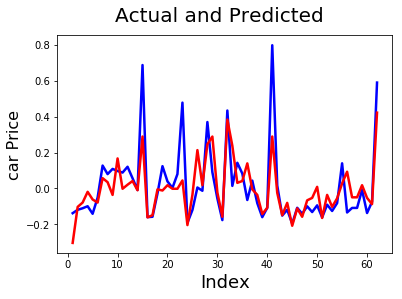

In [588]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m6, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred')

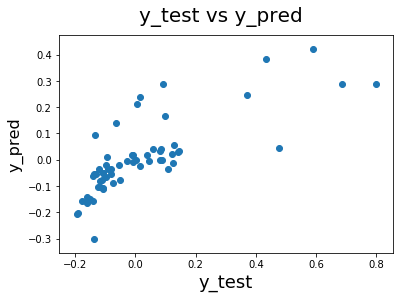

In [589]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

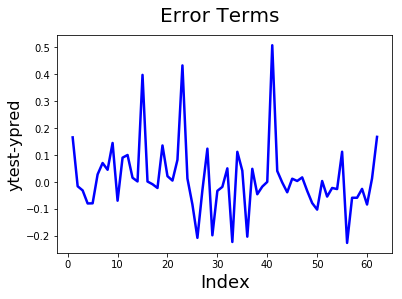

In [591]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m6, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0,0.5,'Index')

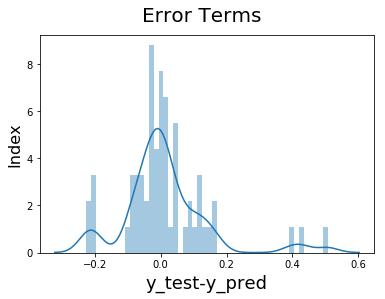

In [592]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m6),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [593]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m6)))

RMSE : 0.1317886584236663
